In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import library as lib
import seaborn as sns
import numpy as npfrom scipy import stats

In [2]:
#import data without duplicates and without scaled
df = lib.import_music_df_with_model(with_scaling = False, remove_dups = True)
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,0
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,2
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,0


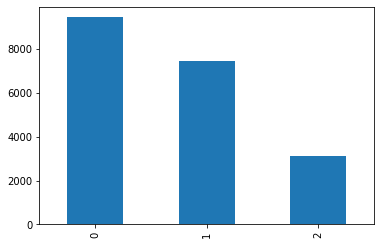

In [3]:
image_filepath = "../images/plots/attributes"#data point counts by cluster
df['Cluster'].value_counts().plot(kind='bar')
# we can see cluste 0 is the majority followed by cluster 1 and cluster 2
df['Cluster'].value_counts().plot(kind='bar').figure.savefig('attributes/total_songs_cluster.png')

In [4]:
df = lib.import_music_df_with_model()
df.head()#the correlation coefficient between each feature
attr_corr= df.iloc[:,6:].corr()
attr_corr

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
danceability,1.000000,0.192708,0.015822,0.128124,0.247520,-0.302829,-0.131932,0.405828,-0.168802,-0.262788
energy,0.192708,1.000000,0.020180,0.686131,0.143066,-0.585827,0.116236,0.353252,0.152538,-0.033395
key,0.015822,0.020180,1.000000,0.012768,0.028605,-0.017080,0.004213,0.006318,-0.009713,-0.005262
loudness,0.128124,0.686131,0.012768,1.000000,0.173577,-0.400594,0.050627,0.026886,0.080002,0.036124
speechiness,0.247520,0.143066,0.028605,0.173577,1.000000,-0.154344,0.077501,-0.003317,0.047922,0.154698
acousticness,-0.302829,-0.585827,-0.017080,-0.400594,-0.154344,1.000000,0.035175,-0.129897,-0.098867,0.046506
liveness,-0.131932,0.116236,0.004213,0.050627,0.077501,0.035175,1.000000,0.010808,0.020255,0.003276
valence,0.405828,0.353252,0.006318,0.026886,-0.003317,-0.129897,0.010808,1.000000,0.065013,-0.078251
tempo,-0.168802,0.152538,-0.009713,0.080002,0.047922,-0.098867,0.020255,0.065013,1.000000,0.231474
Cluster,-0.262788,-0.033395,-0.005262,0.036124,0.154698,0.046506,0.003276,-0.078251,0.231474,1.000000


In [5]:
# the general correlation all the features share
# the ones have weak or moderate correlation
r=[]
c=[]
s=[]
v=[]
for i in range(attr_corr.shape[0]):
    for j in range(attr_corr.shape[1]):
        r.append(attr_corr.index[i])
        c.append(attr_corr.columns[j])
        v.append(abs(attr_corr.iloc[i,j]))
        if attr_corr.iloc[i,j]!=1 and abs(attr_corr.iloc[i,j])>0.3 and abs(attr_corr.iloc[i,j])<0.5:
            s.append('weak')
        elif attr_corr.iloc[i,j]!=1 and abs(attr_corr.iloc[i,j])>0.5and abs(attr_corr.iloc[i,j])<0.7:
            s.append('moderate')
        elif attr_corr.iloc[i,j]!=1 and abs(attr_corr.iloc[i,j])>0.7:
            s.append('strong')

del r[5]
del c[5]
del s[5]
del v[5]
r=r[:-5]
c=c[:-5]
s=s[:-5]
v=v[:-5]

cor_df = pd.DataFrame({'atr1':r,'atr2':c,'strength':s,'value':v}).\
    sort_values('value',ascending=False).reset_index(drop=True)
cor_df

,atr1,atr2,strength,value
0,energy,loudness,moderate,0.686131
1,energy,acousticness,moderate,0.585827
2,danceability,valence,weak,0.405828
3,loudness,acousticness,weak,0.400594
4,energy,valence,weak,0.353252
5,danceability,acousticness,weak,0.302829


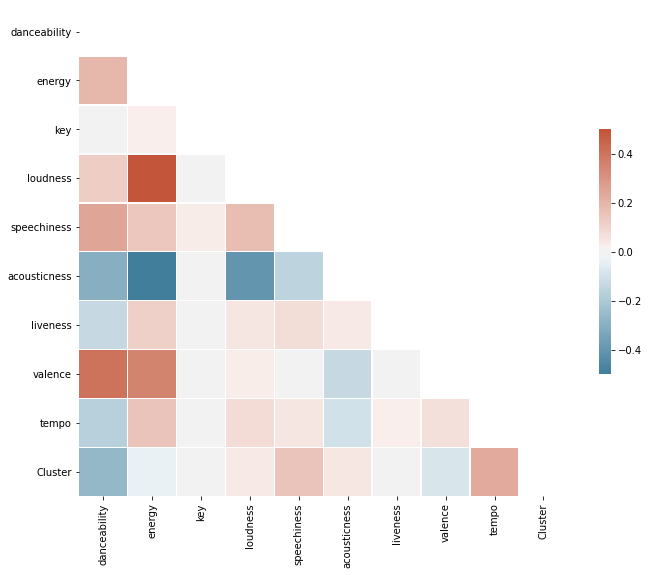

In [6]:
# visuallize the correlation for all features
import numpy as np
# modified by https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(attr_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(attr_corr, mask=mask, cmap=cmap, vmin=-.5,vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# create columns to store the labels,which is done by deviding the values for each attribute into 5 groups
df_label = df.iloc[:,6:]
df_label['count'] = 1
for i in (df_label.columns[:-2]):
    df_label[f'{i}_label'] = list(pd.cut(df_label[i],bins=5))
df_label = df_label.iloc[:,9:]
df_label.head()

,Cluster,count,danceability_label,energy_label,key_label,loudness_label,speechiness_label,acousticness_label,liveness_label,valence_label,tempo_label
0,1,1,"(0.593, 0.79]","(0.41, 0.605]","(-0.011, 2.2]","(-9.837, -3.773]","(-0.00095, 0.19]","(0.795, 0.994]","(0.012, 0.21]","(0.595, 0.793]","(96.404, 144.605]"
4,1,1,"(0.395, 0.593]","(0.214, 0.41]","(4.4, 6.6]","(-9.837, -3.773]","(-0.00095, 0.19]","(0.596, 0.795]","(0.012, 0.21]","(0.396, 0.595]","(48.202, 96.404]"
7,0,1,"(0.593, 0.79]","(0.41, 0.605]","(-0.011, 2.2]","(-9.837, -3.773]","(-0.00095, 0.19]","(0.596, 0.795]","(0.012, 0.21]","(0.595, 0.793]","(96.404, 144.605]"
14,2,1,"(0.395, 0.593]","(0.41, 0.605]","(4.4, 6.6]","(-15.902, -9.837]","(-0.00095, 0.19]","(0.398, 0.596]","(0.012, 0.21]","(0.793, 0.991]","(144.605, 192.807]"
16,0,1,"(0.198, 0.395]","(0.214, 0.41]","(2.2, 4.4]","(-15.902, -9.837]","(-0.00095, 0.19]","(0.596, 0.795]","(0.21, 0.407]","(0.396, 0.595]","(96.404, 144.605]"


In [8]:
#calculate the independance between each features and cluster with Chi Square Test
attribute_list = []
sig_list = []
p_value_list = []


for i in (df.columns[6:-1]):
    attri_raw = df_label[[f'{i}_label','count','Cluster']]

        
    cumulated_feature_by_cluster = attri_raw.groupby([f'{i}_label','Cluster'])['count'].sum()


    chi_df =  cumulated_feature_by_cluster.unstack().fillna(0)
    chi_df_np = chi_df.to_numpy()
    
    
    attribute_list.append(i)
    
    chi_squared_stat, p_value, df_chi, expected_crosstab = stats.chi2_contingency(chi_df_np)
    if p_value < 0.05:
        sig_list.append('O')
    else:
        sig_list.append(' ')
    p_value_list.append(p_value)

sig_df = pd.DataFrame({'attribute':attribute_list,'significant':sig_list,'p_value':p_value_list})
sig_df = sig_df.sort_values('p_value').reset_index(drop=True)
sig_df

,attribute,significant,p_value
0,danceability,O,0.000000e+00
1,tempo,O,0.000000e+00
2,energy,O,2.009710e-95
3,speechiness,O,3.722048e-85
4,valence,O,2.708966e-71
5,acousticness,O,1.199652e-46
6,loudness,O,6.951013e-23
7,liveness,O,6.273348e-04
8,key,,5.581717e-02


In [9]:
from collections import Counter
Counter(df["Cluster"])

In [ ]:
def dist_plot_cluster_percent(label_list=df.columns[6:-1]):
label_list=sig_df['attribute'][:-1]
def dist_plot_cluster_percent(label_list=label_list):
    for i in label_list:
        fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
        plt.subplots_adjust(wspace = 0.5,hspace=0.5)
        fig.suptitle(f'Distribution Plot for [{i}]',y=1.05)
        attri_raw=df_label[[f'{i}_label','count','Cluster']]
        x_axis=[]
        for l in list(attri_raw[f'{i}_label'].sort_values().unique()):
            x_axis.append(str(l))        
       
        if i == 'tempo':
            for c in list(range(3)):
                pd_raw=attri_raw[attri_raw['Cluster']==c]
                pd_series=pd_raw[f'{i}_label']
                mode=pd_series.value_counts().index[0]
                color=['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
                color[x_axis.index(str(mode))]='darkred'
                y_axises={0:[0,0,31651,989,0],1:[11,14601,11682,0,0],2:[0,0,0,10160,811]}
                y_axis = [i/sum(y_axises[c])*100 for i in y_axises[c]]
                axes[c].bar(x=x_axis,height=y_axis,color=color)
                axes[c].set_title(f'The mode of {i} for \n[Cluster {c}] is {mode}')
                axes[c].set_xticklabels(x_axis, rotation=90)
                axes[0].set_ylabel('Percentage')
            i=False
            plt.savefig(f'{image_filepath}/{i}'.lower())
                axes[0].set_ylabel('Percentage_percent')
            plt.savefig(f'attributes/{i}')
                
        else:
            for c in list(range(3)):
                pd_raw=attri_raw[attri_raw['Cluster']==c]
                pd_series=pd_raw[f'{i}_label']
                mode=pd_series.value_counts().index[0]
                color=['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
                color[x_axis.index(str(mode))]='darkred'
                y_axis=pd_raw.groupby(f'{i}_label')['count'].sum()
                total=sum(y_axis)
                y_axis=[i/total*100 for i in y_axis]
                axes[c].bar(x=x_axis,height=y_axis,color=color)
                axes[c].set_title(f'The mode of {i} for \n[Cluster {c}] is {mode}')
                axes[c].set_xticklabels(x_axis, rotation=90)
                axes[0].set_ylabel('Percentage')
            plt.savefig(f'{image_filepath}/{i}_percent'.lower())
        
        plt.show()
    

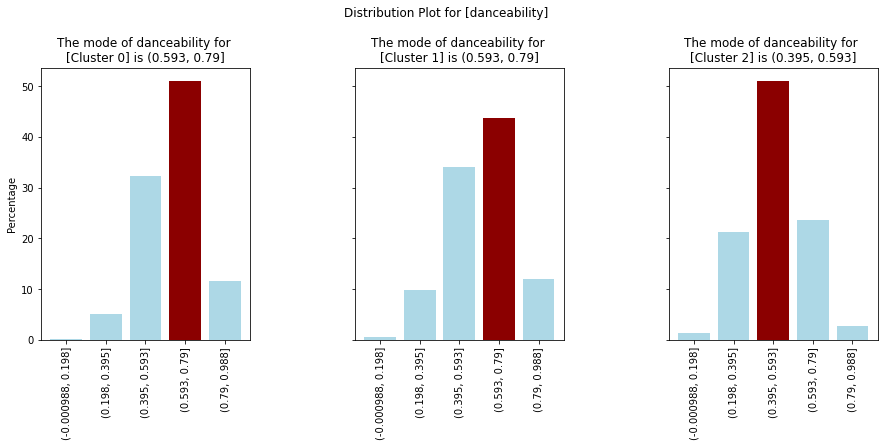

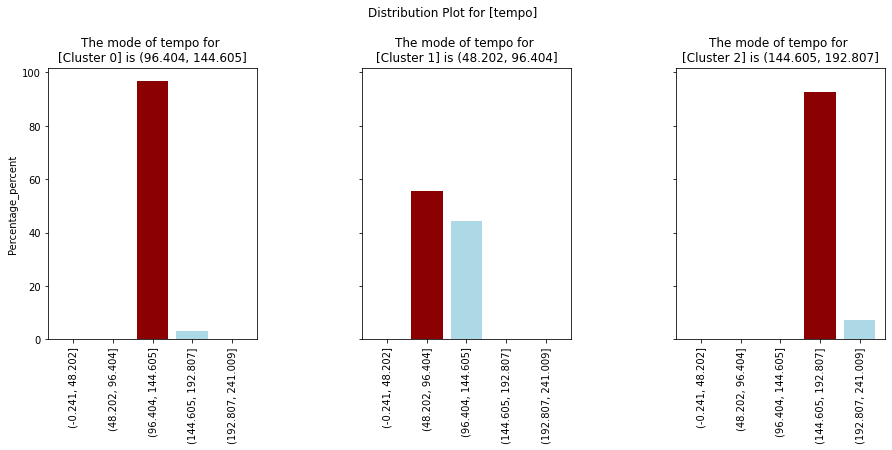

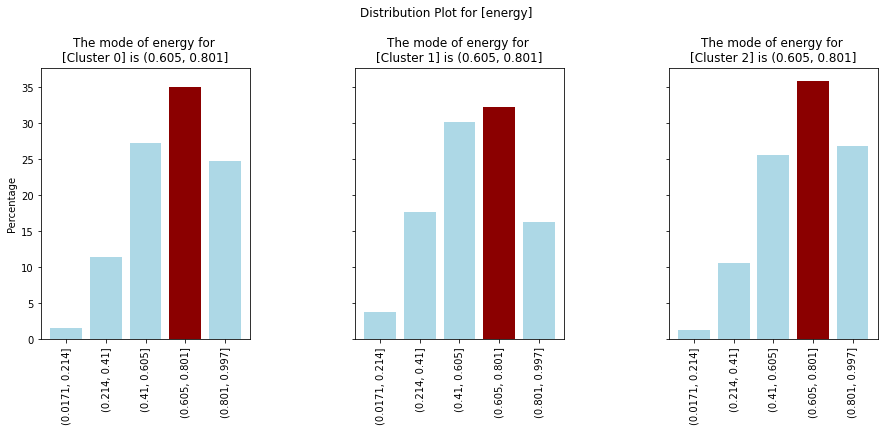

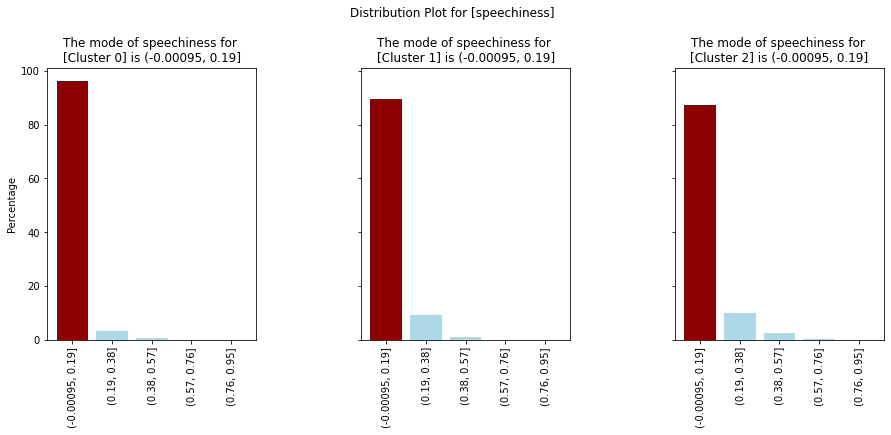

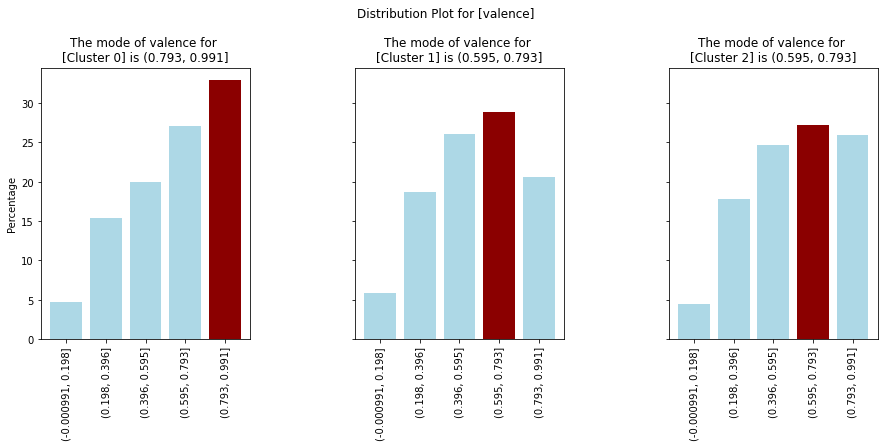

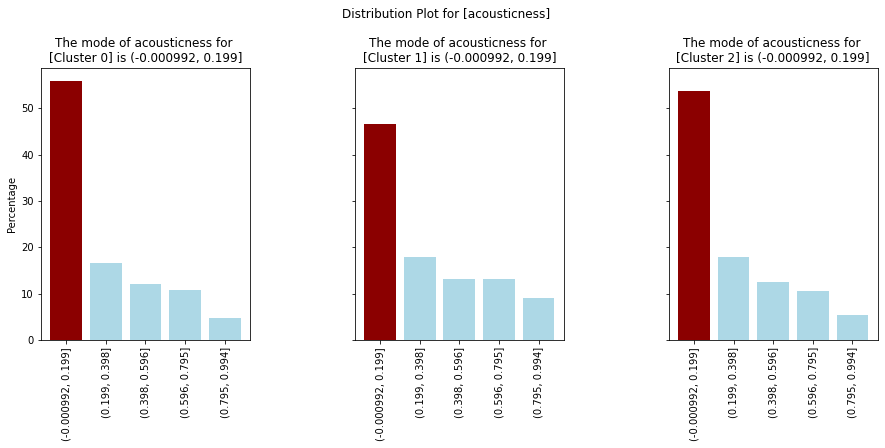

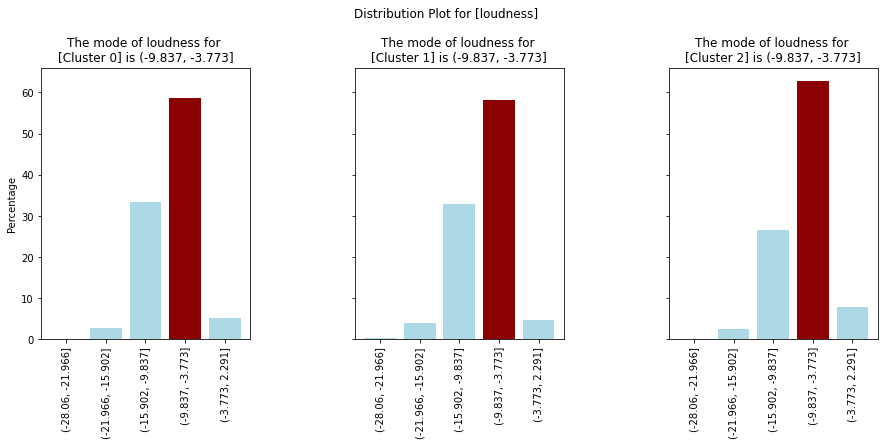

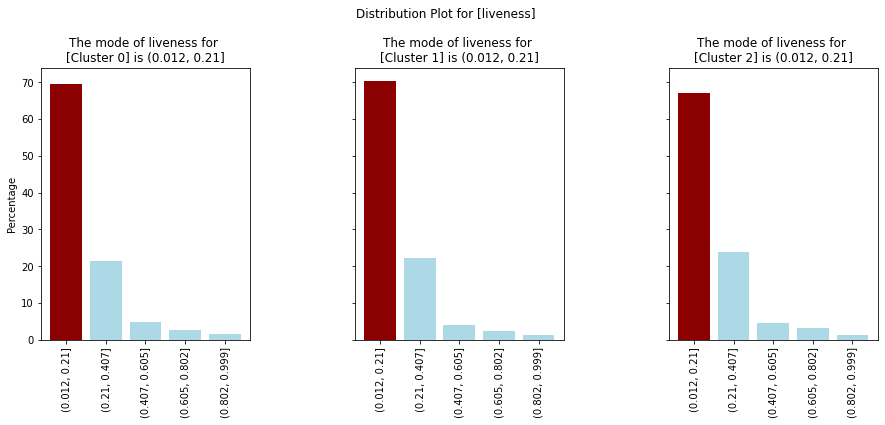

In [10]:
dist_plot_cluster_percent()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=3,n_estimators=100)
clf.fit(X_train, y_train)
clf.feature_importances_

array([7.98390514e-02, 1.22429223e-02, 2.04897090e-04, 3.68588847e-03,
       6.96581628e-02, 1.53047969e-02, 1.37128580e-04, 1.36718863e-02,
       8.05255266e-01])

In [97]:
predictions = clf.predict(X_test)
errors = abs(predictions - y_test)
total_error_counts=[1 if i!=0 else 0 for i in errors]
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [98]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (sum(total_error_counts) / len(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.13 %.


In [100]:
pd.DataFrame({'feature':feature_cols.columns,'importance':clf.feature_importances_}).sort_values('importance',ascending=False)

,feature,importance
8,tempo,0.805255
0,danceability,0.079839
4,speechiness,0.069658
5,acousticness,0.015305
7,valence,0.013672
1,energy,0.012243
3,loudness,0.003686
2,key,0.000205
6,liveness,0.000137


In [ ]:
#cluster has better corr with these
cluster=[['Cluster','danceability'],['Cluster','speechiness'],['Cluster','tempo']]

#t test?
#chi square test?